In [1]:
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

for f in fm.fontManager.ttflist:
    if 'NanumBarunGothic' in f.fname:
        plt.rcParams['font.family'] = 'NanumBarunGothic' # 폰트를 나눔고딕으로
print(plt.rcParams['font.family'])
matplotlib.rcParams['axes.unicode_minus'] = False #'-'기호 제대로 나오게함

['NanumBarunGothic']


In [2]:
df_body = pd.read_csv("../data/체질검사.csv",encoding = "euc-kr")
df_body.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [3]:
df_body_x = df_body.drop("FAT",axis= 1)
df_body_y = df_body["FAT"]
df_body_x.head()

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [4]:
df_body_x.corr()

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
AGE,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
WEIGHT,-0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
HEIGHT,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
NECK,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
CHEST,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
ABDOMEN,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
HIP,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
THIGH,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685
KNEE,0.017516,0.853167,0.286053,0.672405,0.719496,0.737179,0.823473,0.799170,1.000000,0.611608,0.678709,0.555898,0.664507
ANKLE,-0.105058,0.613685,0.264744,0.477892,0.482988,0.453223,0.558387,0.539797,0.611608,1.000000,0.484855,0.419050,0.566195


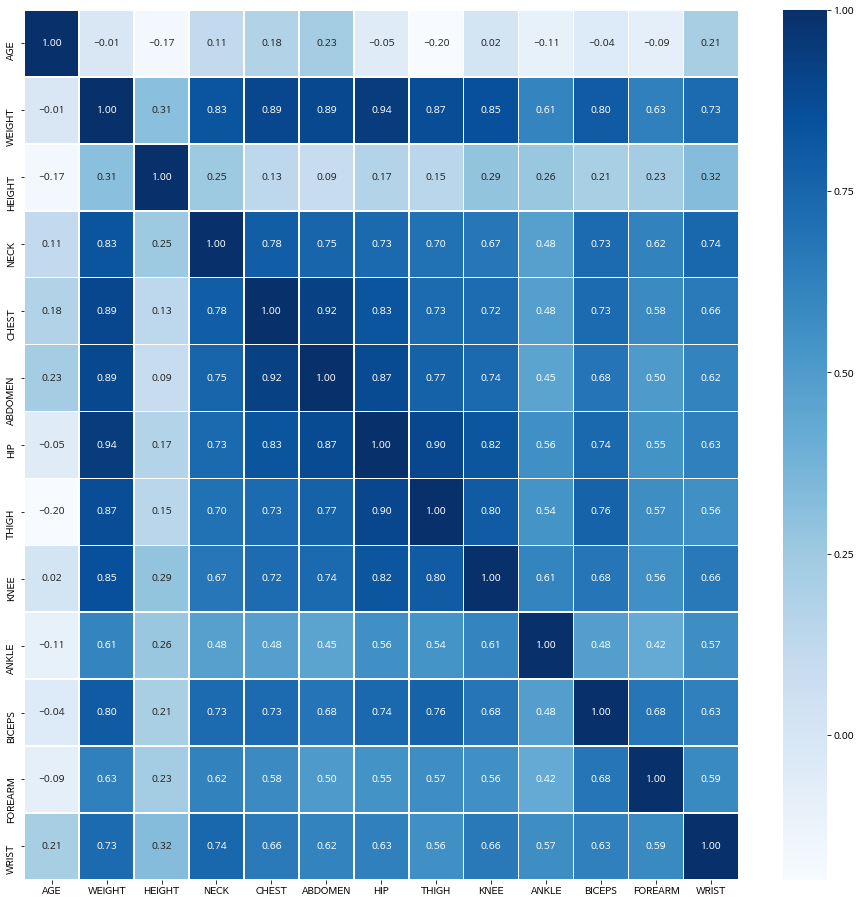

In [14]:
plt.figure(figsize= (16,16))
sns.heatmap(df_body_x.corr(),annot= True, fmt = ".2f",linewidths =.5,cmap ='Blues' )

In [5]:
#데이터 표준화
scaler = StandardScaler()
#데이터표준화변환
df_body_x_scaled = scaler.fit_transform(df_body_x)
#표준화된 데이터 확인
print("Scaled Data :\n{}".format(df_body_x_scaled[:4].round(3)))
print("Shape :\n{}".format(df_body_x_scaled.shape))


Scaled Data :
[[ 0.089  6.281  0.575  5.444  4.205  5.161  6.685  5.324  4.366  3.841
   4.221  0.167  3.403]
 [-1.422 -0.372  0.301  0.044 -0.93  -1.25  -0.756 -0.402 -0.993  0.826
  -1.086  0.663  0.612]
 [ 1.917 -0.04  -0.451  0.292  0.14   0.227 -0.224 -0.841 -0.121 -0.77
  -0.489 -1.47   0.612]
 [ 0.963 -1.063 -1.203 -1.151 -0.146 -0.572 -1.371 -1.223 -1.492 -1.066
  -0.19  -0.676 -1.427]]
Shape :
(252, 13)


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
# 주성분 분석모델 생성 Prin1 ~ 30 까지
pca = PCA(n_components=13)
x_pca = pca.fit_transform(df_body_x_scaled)
#계산된 Prin1~6까지의 Row개수, column개수 화인
print("PCA DATA : \n{}".format(x_pca[:12]))
#shape : Prin 1~6까지 Row개수, column개수 확인
print("Shape: \n{}".format(x_pca.shape))
print("Shape: \n{}".format(df_body_x_scaled.shape))
#주성분 점수 저장
df_x_pca = pd.DataFrame(x_pca,columns = ["Prin"+ str(i) for i in range(1,14)])
#주성분 점수 저장
df_x_pca.head()

PCA DATA : 
[[ 1.51407865e+01  7.49180061e-01  1.73038829e+00  2.97562799e+00
  -1.20140416e+00  1.91649244e+00 -5.65465823e-01  6.41639529e-01
  -7.16668464e-01  6.67288487e-01  1.11830608e+00 -3.74402932e-01
  -4.01646380e-01]
 [-1.25745311e+00 -1.79805793e+00 -6.03591475e-01 -4.05941404e-01
   1.33324667e+00  8.22236818e-01  1.74463381e-01 -1.01801483e+00
   3.69261273e-02  3.76706308e-01 -8.75860804e-02 -1.14957740e-01
  -2.18982014e-01]
 [-7.27442052e-01  2.31886158e+00 -8.92096811e-01  6.82580352e-01
  -5.03280467e-01  6.00209382e-01 -5.16400793e-01 -9.56416513e-03
   4.79435580e-02 -2.64350345e-01  1.76015189e-01 -7.71764507e-02
  -1.35788495e-01]
 [-3.21015592e+00  1.46511228e+00  4.57907542e-01 -5.75637151e-01
   1.97721197e-02 -1.78803322e-01  7.16879046e-01  8.43042247e-01
   2.18223478e-01 -2.55255904e-01 -2.38793622e-01 -1.00886784e-01
  -1.22172296e-01]
 [ 3.24650172e+00  2.29304235e+00  1.82833929e+00 -2.33659425e-02
  -4.06978793e-01  1.14656798e+00  1.70117486e+00 -1.0

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10,Prin11,Prin12,Prin13
0,15.140787,0.749180,1.730388,2.975628,-1.201404,1.916492,-0.565466,0.641640,-0.716668,0.667288,1.118306,-0.374403,-0.401646
1,-1.257453,-1.798058,-0.603591,-0.405941,1.333247,0.822237,0.174463,-1.018015,0.036926,0.376706,-0.087586,-0.114958,-0.218982
2,-0.727442,2.318862,-0.892097,0.682580,-0.503280,0.600209,-0.516401,-0.009564,0.047944,-0.264350,0.176015,-0.077176,-0.135788
3,-3.210156,1.465112,0.457908,-0.575637,0.019772,-0.178803,0.716879,0.843042,0.218223,-0.255256,-0.238794,-0.100887,-0.122172
4,3.246502,2.293042,1.828339,-0.023366,-0.406979,1.146568,1.701175,-0.101494,0.539822,0.304860,0.468418,0.275033,0.090397


In [11]:
# 고유값 확인
#주성분 통계량 입력용 새로운 데이터 프레임 생성
df_pca = pd.DataFrame()
#주성분 분석 모델의 주성분 번호, Elgenvalue, Eigenvalue Ratio 등을 데이터 프레임의 형태로 저장
df_pca["Prin"] = [i for i in range(1,14)]
df_pca["EigenValues"] = pca.explained_variance_##Eigen values
df_pca["EigenValueRatio"] = pca.explained_variance_ratio_## Eigenvalue Ratio
df_pca["CumsumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca.round(3)
# 아이젠벡터의 값이 큰 주성분이 설명력이 높다

,Prin,EigenValues,EigenValueRatio,CumsumEigenValueRatio
0,1,8.072,0.618,0.618
1,2,1.360,0.104,0.723
2,3,1.006,0.077,0.800
3,4,0.670,0.051,0.851
4,5,0.601,0.046,0.897
5,6,0.315,0.024,0.921
6,7,0.287,0.022,0.943
7,8,0.262,0.020,0.963
8,9,0.184,0.014,0.978
9,10,0.135,0.010,0.988


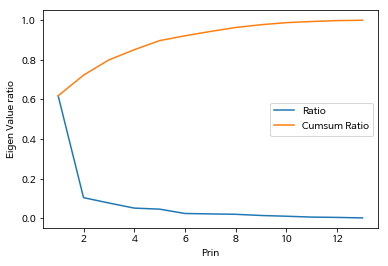

In [15]:
plt.plot(df_pca["Prin"],df_pca["EigenValueRatio"],label ="Ratio")
# 누적된 고유값 비율 그래프 생성
plt.plot(df_pca["Prin"],df_pca["CumsumEigenValueRatio"],label = "Cumsum Ratio")
# 그래프 label, lengend 설정
plt.ylabel("Eigen Value ratio")
plt.xlabel("Prin")
plt.legend(loc = "best")